<a href="https://colab.research.google.com/github/kimyujin0/Machine-Learning_2022/blob/main/kaggle_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 직원의 이직과 복지 개선
## 직원 이직률 감소 방안 모색

In [172]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(upload['HR Employee Attrition.csv'].decode('utf-8')))
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [138]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

시각화

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

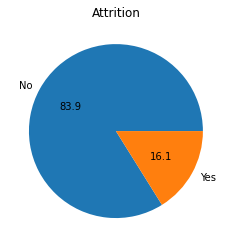

In [192]:
plt.pie(df['Attrition'].value_counts(), labels=df['Attrition'].value_counts().keys(),autopct='%.1f')
plt.title('Attrition')
plt.show()

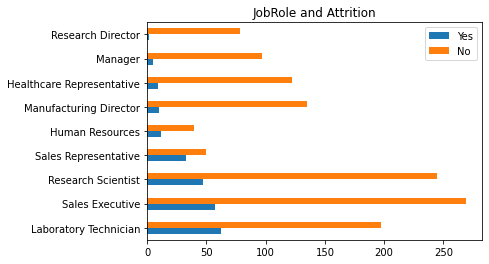

In [206]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['JobRole'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['JobRole'].value_counts()

n_df.plot.barh(title = 'JobRole and Attrition')

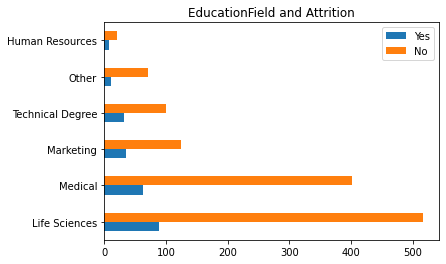

In [207]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['EducationField'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['EducationField'].value_counts()

n_df.plot.barh(title = 'EducationField and Attrition')

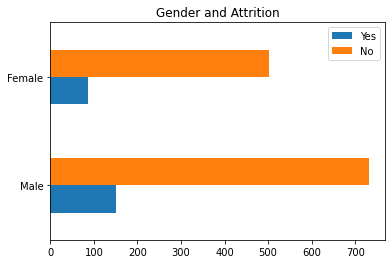

In [205]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['Gender'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['Gender'].value_counts()

n_df.plot.barh(title = 'Gender and Attrition')

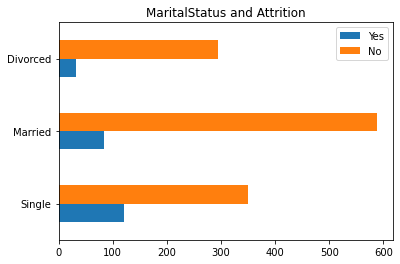

In [208]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['MaritalStatus'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['MaritalStatus'].value_counts()

n_df.plot.barh(title = 'MaritalStatus and Attrition')

In [14]:
data_size = df.pivot_table(index="EnvironmentSatisfaction", columns="Attrition", aggfunc="size")
data_size

Attrition,No,Yes
EnvironmentSatisfaction,,
1,212,72
2,244,43
3,391,62
4,386,60


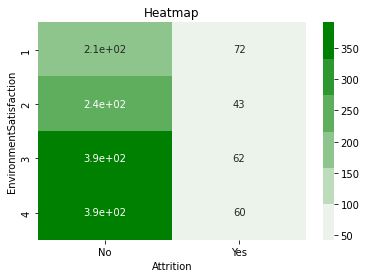

In [15]:
sns.heatmap(data_size, cmap=sns.light_palette("green"),annot=True)
plt.title("Heatmap")
plt.show()

In [16]:
job_size = df.pivot_table(index="JobSatisfaction", columns="Attrition", aggfunc="size")
job_size

Attrition,No,Yes
JobSatisfaction,,
1,223,66
2,234,46
3,369,73
4,407,52


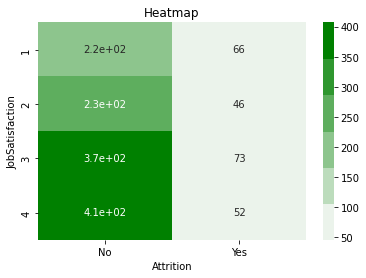

In [17]:
sns.heatmap(job_size, cmap=sns.light_palette("green"),annot=True)
plt.title("Heatmap")
plt.show()

In [18]:
wlb_size = df.pivot_table(index="WorkLifeBalance", columns="Attrition", aggfunc="size")
wlb_size

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


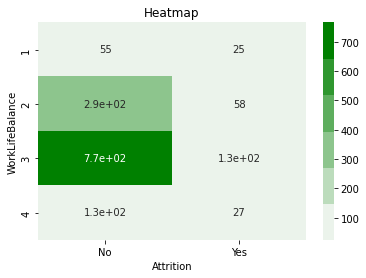

In [19]:
sns.heatmap(wlb_size, cmap=sns.light_palette("green"),annot=True)
plt.title("Heatmap")
plt.show()

데이터 전처리

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [22]:
print(df.groupby('Attrition').size())

Attrition
No     1233
Yes     237
dtype: int64


In [23]:
df.replace(['Yes','No'],[1,0])
df.replace('Y',1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
for column in df.columns:
    fields = []
    if df[column].dtype == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column].values)

In [26]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [29]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [30]:
df_corr = df.corr(method='pearson')
df_corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


In [173]:
# 상관관계가 없는 것들 지우기
new_df = df.copy()
new_df = df.drop(columns = ['Over18','EmployeeCount','StandardHours'])

In [174]:
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [35]:
x_df = new_df.drop(columns=['Attrition'])

In [37]:
# 데이터 나누기
from sklearn.model_selection import train_test_split
X = x_df
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size=0.3)

랜덤포레스트

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [45]:
rclf = RandomForestClassifier(n_estimators=100)
rclf.fit(X_train, y_train)
random_pred = rclf.predict(X_test)
rclf.fit(X_train, y_train)

Accuracy: 86.62131519274377
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.60      0.10      0.17        61

    accuracy                           0.87       441
   macro avg       0.74      0.54      0.55       441
weighted avg       0.83      0.87      0.82       441



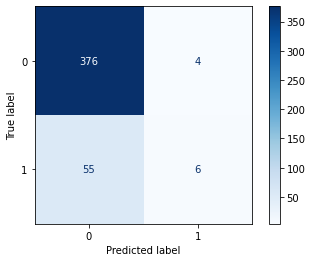

In [179]:
print("Accuracy:", metrics.accuracy_score(y_test,random_pred)*100)
print(metrics.classification_report(y_test, random_pred))
ConfusionMatrixDisplay.from_predictions(y_test, random_pred, cmap = 'Blues')

knn

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

Accuracy: 82.76643990929705
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       380
           1       0.24      0.11      0.16        61

    accuracy                           0.83       441
   macro avg       0.56      0.53      0.53       441
weighted avg       0.78      0.83      0.80       441



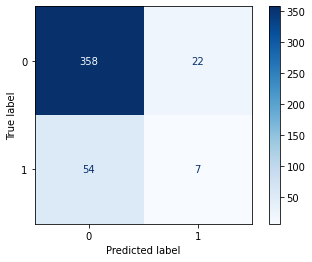

In [164]:
print("Accuracy:", knn.score(X_test, y_test)*100)
print(metrics.classification_report(y_test, knn_pred))
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, cmap = 'Blues')

의사결정나무

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
dtree_pred = clf.predict(X_test)

Accuracy: 78.2312925170068
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       380
           1       0.28      0.36      0.31        61

    accuracy                           0.78       441
   macro avg       0.59      0.61      0.59       441
weighted avg       0.81      0.78      0.79       441



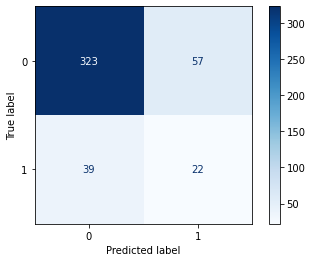

In [165]:
print("Accuracy:", metrics.accuracy_score(y_test, dtree_pred)*100)
print(metrics.classification_report(y_test, dtree_pred))
ConfusionMatrixDisplay.from_predictions(y_test, dtree_pred, cmap = 'Blues')

XGBoost

In [59]:
from xgboost import XGBClassifier

In [166]:
xgb = XGBClassifier(n_estimators = 100)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

Accuracy: 87.75510204081633
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.63      0.28      0.39        61

    accuracy                           0.88       441
   macro avg       0.76      0.63      0.66       441
weighted avg       0.86      0.88      0.86       441



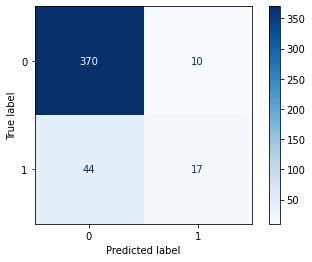

In [167]:
print("Accuracy:", metrics.accuracy_score(y_test,xgb_pred)*100)
print(metrics.classification_report(y_test, xgb_pred))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, cmap = 'Blues')

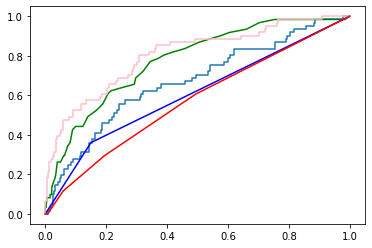

In [64]:
# ROC Curve
from sklearn.metrics import roc_curve
prob = log.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,prob)
plt.plot(fpr , tpr, label='ROC')

roc = rclf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,roc)
plt.plot(fpr , tpr, color='green')

clf_roc = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,clf_roc)
plt.plot(fpr , tpr, color='blue')

xgbr = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,xgbr)
plt.plot(fpr , tpr, color='pink')

knnr = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,knnr)
plt.plot(fpr , tpr, color='red')

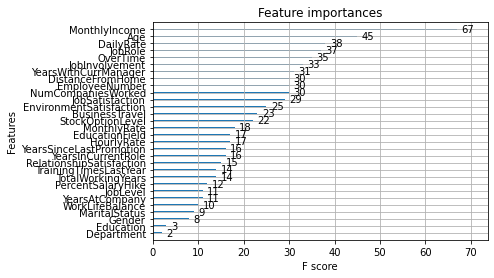

In [212]:
# 변수 중요도
from xgboost import plot_importance

ax=plot_importance(xgb)
plt.title('Feature importances')
plt.show()

변수중요도에 대한 설명(1위는 뭐, 2위는 뭐, 3위는 뭐)

In [69]:
df_new = df.copy()

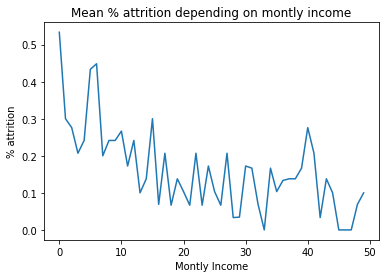

In [276]:
# 50 단위로 구간 분할
df_new['MI_split'] = pd.qcut(df_new['MonthlyIncome'], 50, labels=False, duplicates = 'drop')

mean_deposit = df_new.groupby(['MI_split'])['Attrition'].mean()

# plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % attrition depending on montly income')
plt.xlabel('Montly Income')
plt.ylabel('% attrition')
plt.show()

In [295]:
df_new[df_new['MI_split'] == 6]['MonthlyIncome'].min()

2370

이 그래프를 보고 2370 이하의 돈을 받는 사람이 이직 가능성이 높다.

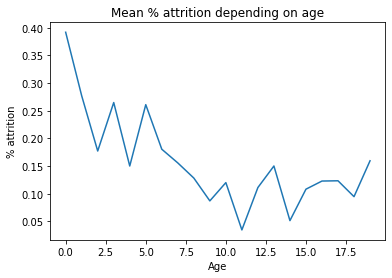

In [284]:
df_new['age_split'] = pd.qcut(df_new['Age'], 20, labels=False, duplicates = 'drop')

mean_deposit = df_new.groupby(['age_split'])['Attrition'].mean()

plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % attrition depending on age')
plt.xlabel('Age')
plt.ylabel('% attrition')
plt.show()

In [290]:
df_new[df_new['age_split'] == 5]['Age'].min()

31

In [289]:
df_new[df_new['age_split'] == 9]['Age'].max()

36

31살 이상 36살 이하가 이직을 많이 한다.

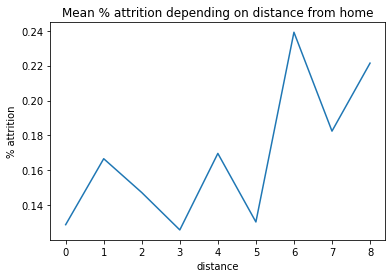

In [297]:
df_new['distance_split'] = pd.qcut(df_new['DistanceFromHome'], 10, labels=False, duplicates = 'drop')

mean_deposit = df_new.groupby(['distance_split'])['Attrition'].mean()

plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % attrition depending on distance from home')
plt.xlabel('distance')
plt.ylabel('% attrition')
plt.show()

In [298]:
df_new[df_new['distance_split'] == 5]['DistanceFromHome'].min()

10

집과의 거리가 10 이상이면 이직 가능성이 있다

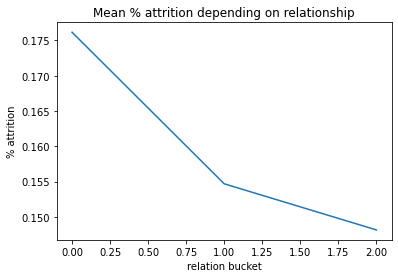

In [282]:
df_new['relation_split'] = pd.qcut(df_new['RelationshipSatisfaction'], 20, labels=False, duplicates = 'drop')

mean_deposit = df_new.groupby(['relation_split'])['Attrition'].mean()

plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % attrition depending on relationship')
plt.xlabel('relation bucket')
plt.ylabel('% attrition')
plt.show()

In [283]:
df_new[df_new['relation_split'] ==1]['RelationshipSatisfaction'].min()

3

관계 만족이 3점 미만이면 이직 가능성이 높다.